In [69]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from collections import Counter as c
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
import pickle


In [7]:
#reading the dataset
df = pd.read_excel('/content/Concrete_Data.xls')


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [8]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
df.tail()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [10]:
df.columns = [col[:col.find("(")].strip() for col in df.columns]

In [11]:
df.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [16]:
df.isnull()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


<Axes: >

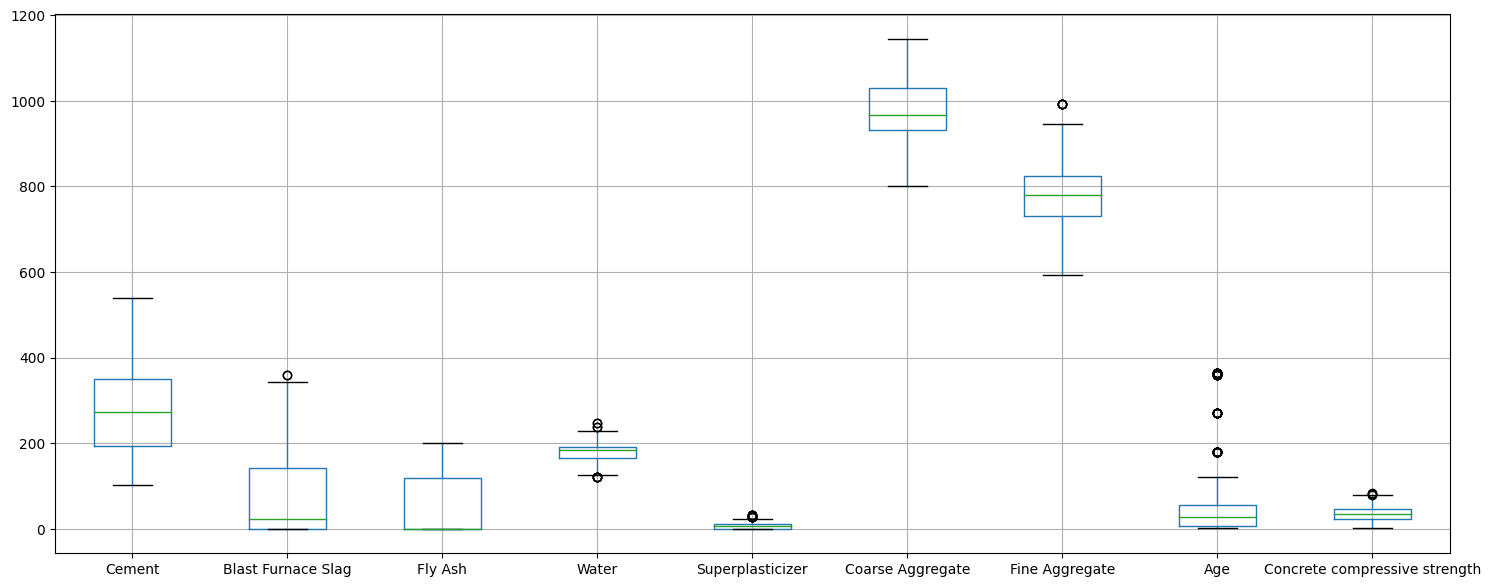

In [17]:
df.boxplot(figsize=(18,7))

In [20]:
#detecting outliers
IQR=df['Water'].quantile(0.75)-df['Water'].quantile(0.25)
IQR

27.099999999999994

In [27]:
upperBound=df['Water'].quantile(0.75)+(1.5*IQR)
upperBound
lowerBound=df['Water'].quantile(0.25)-(1.5*IQR)
lowerBound

124.25000000000001

<Axes: ylabel='Water'>

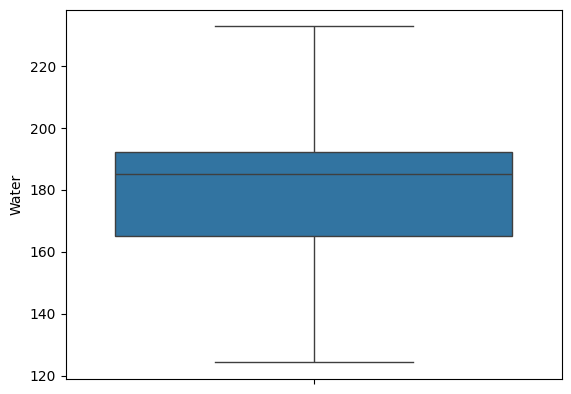

In [26]:
df['Water']=np.where(df['Water']>upperBound,upperBound,df['Water'])
df['Water']=np.where(df['Water']<lowerBound,lowerBound,df['Water'])
sns.boxplot(df['Water'])

In [32]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
IQR

49.0

<Axes: ylabel='Age'>

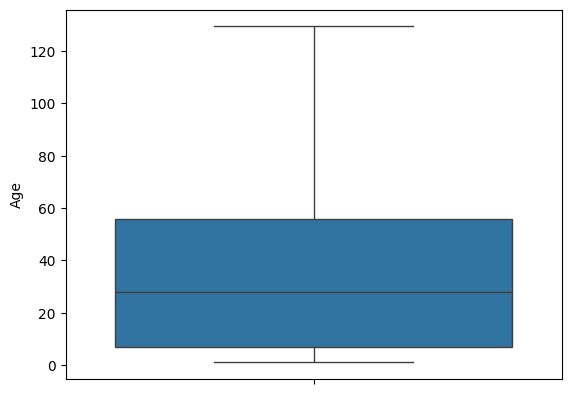

In [36]:
upperBound=df['Age'].quantile(0.75)+(1.5*IQR)
upperBound
df['Age']=np.where(df['Age']>upperBound,upperBound,df['Age'])
sns.boxplot(df['Age'])

In [37]:
IQR=df['Blast Furnace Slag'].quantile(0.75)-df['Blast Furnace Slag'].quantile(0.25)
IQR

142.95

In [38]:
upperBound=df['Blast Furnace Slag'].quantile(0.75)+(1.5*IQR)
upperBound

357.375

<Axes: ylabel='Blast Furnace Slag'>

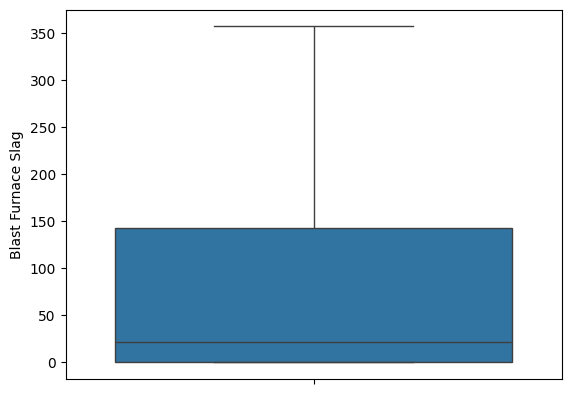

In [39]:
df['Blast Furnace Slag']=np.where(df['Blast Furnace Slag']>upperBound,upperBound,df['Blast Furnace Slag'])
sns.boxplot(df['Blast Furnace Slag'])

In [40]:
IQR=df['Superplasticizer'].quantile(0.75)-df['Superplasticizer'].quantile(0.25)
IQR

10.16

In [42]:
upperBound=df['Superplasticizer'].quantile(0.75)+(1.5*IQR)
upperBound



25.4

<Axes: ylabel='Superplasticizer'>

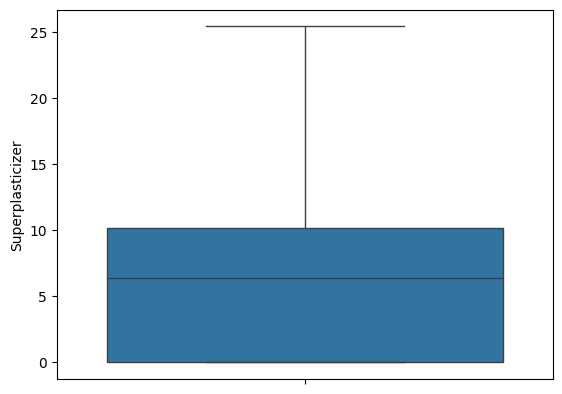

In [43]:
df['Superplasticizer']=np.where(df['Superplasticizer']>upperBound,upperBound,df['Superplasticizer'])
sns.boxplot(df['Superplasticizer'])

In [44]:
IQR=df['Fine Aggregate'].quantile(0.75)-df['Fine Aggregate'].quantile(0.25)
IQR

93.04999999999995

In [45]:
upperBound=df['Fine Aggregate'].quantile(0.75)+(1.5*IQR)
upperBound

963.5749999999999

<Axes: ylabel='Fine Aggregate'>

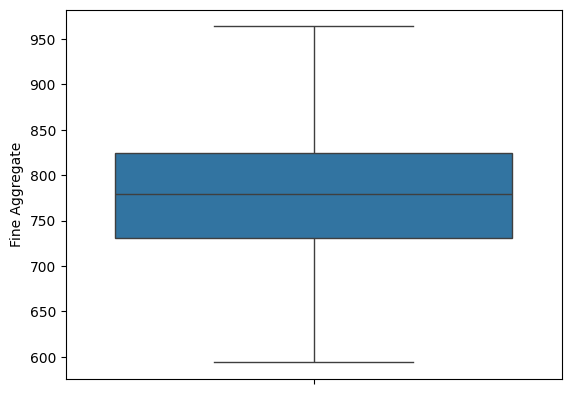

In [46]:
df['Fine Aggregate']=np.where(df['Fine Aggregate']>upperBound,upperBound,df['Fine Aggregate'])
sns.boxplot(df['Fine Aggregate'])

In [47]:
IQR=df['Concrete compressive strength'].quantile(0.75)-df['Concrete compressive strength'].quantile(0.25)
IQR

22.429171387

In [48]:
upperBound=df['Concrete compressive strength'].quantile(0.75)+(1.5*IQR)
upperBound

79.78004362050001

<Axes: ylabel='Concrete compressive strength'>

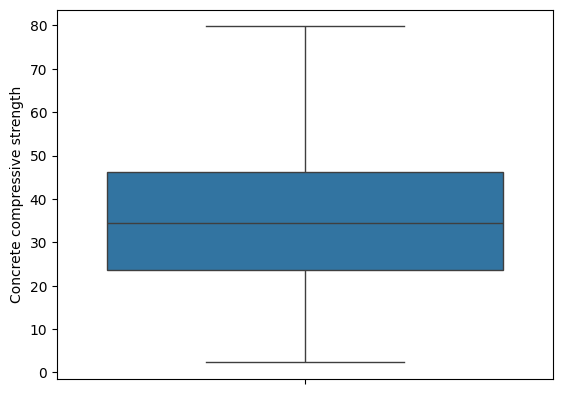

In [49]:
df['Concrete compressive strength']=np.where(df['Concrete compressive strength']>upperBound,upperBound,df['Concrete compressive strength'])
sns.boxplot(df['Concrete compressive strength'])

In [50]:
df['Concrete compressive strength'].describe()


count    1030.000000
mean       35.812577
std        16.691470
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        79.780044
Name: Concrete compressive strength, dtype: float64

In [52]:
x = pd.DataFrame(df,columns=df.columns[:8])
y = pd.DataFrame(df,columns=df.columns[8:])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
# Splitting the features and target variable

cols = df.columns.drop('Concrete compressive strength')
x = df[cols]
y = df['Concrete compressive strength']

In [61]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
lr.score(x_train,y_train)
lr.score(x_test,y_test)


0.7459334448168664

In [85]:
ypred=lr.predict(x_test)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor


In [76]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [77]:
gbr.score(x_train,y_train)
gbr.score(x_test,y_test)

0.8850555591874988

In [84]:
ypred=gbr.predict(x_test)

In [83]:
print("MAE",mean_absolute_error(y_test,ypred))
print("MSE",mean_squared_error(y_test,ypred))
print("RMSE",np.sqrt(mean_squared_error(y_test,ypred)))

MAE 6.380986705618571
MSE 65.4681463878349
RMSE 8.09123886607205


In [95]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)

print(bgr.predict([[0.48,0.56,0.99,64.7,55.8,77.4,46.8,39.64]])) # Now 'bgr' can make predictions

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[52.59877382]


In [96]:
pickle.dump(gbr,open('cement.pkl','wb'))